# Predicting the monthly rental price of an apartment in Tel Aviv.

In this project, I tried to predict the Predicting the monthly rental price of an apartment in Tel Aviv.

As someone who has rented several apartments throughout my life and has a general interest in real estate prices, 
I was intrigued to specifically undertake a project about the city of Tel Aviv, where people are willing to pay even amounts exceeding 20,000 NIS per month for a three rooms apartment. I am curious to explore which factors influence the price of an apartment and which ones do not, and so on.

Beyond my personal curiosity, I believe this project can be helpful for people searching for an apartment in Tel Aviv.
Many times, people advertise apartments without specifying the price.
Throughout the years of searching for apartments, I would have greatly appreciated a platform that could predict the rental price of the apartments I was interested in.

In order to research data and build a model that predicts the monthly rental price, we scraped data from the real estate website:
https://www.ad.co.il

This site contains apartments for rent divided by cities

To scrape the data, I used the Selenium library to navigate through the categories. Some of the data was not relevant to our purpose, so I selected specific categories that we thought could affect the monthly rental price.

First, I imported the relevant libraries for use:

In [147]:
#for the crawling
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from time import sleep
import csv

#for the EDA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#for the machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

Then I made the Crawling.
Some of the variables were Boolean, so I used a separate list for them.

In [59]:
driver = webdriver.Chrome()
driver.get("https://www.ad.co.il")
driver.maximize_window()
wait = WebDriverWait(driver, 10000)
relevent_features=["מזגן" ,"חניה","סורגים","מרוהטת","משופצת","מחסן","מעלית",'ממ"ד',"נגישות", "מרפסת"]
dataframe_columns=['City','Address',  'Type' ,'Price','Rooms','Build Size', 'Floor']
main_dataframe=pd.DataFrame(columns=dataframe_columns+relevent_features)
file_path = 'C:/Users/Neomi/Desktop/final project in data science/Data_Base'

for j in range(1 , 100):#going through pages
    driver.get(f'https://www.ad.co.il/nadlanrent?sp275=17413&pageindex={j}')
    try:
        elements = driver.find_elements(By.CLASS_NAME, 'card-block')
    except:
        continue
    end = len(elements) - 3
    time.sleep(7)
    for i in range(end):#going through each home box
        box_data=pd.DataFrame(columns=dataframe_columns+relevent_features)
        print('page ' , j , 'item ' ,i)
        elements[i].click()
        time.sleep(7)
        inside_elements = driver.find_element(By.CLASS_NAME, 'col-xxl-4.col-lg-4.col-md-5')
        City = '0'
        Address = '0'
        Type = '0'
        Price = '0'
        Rooms = '0'
        Build_Size = '0'
        Floor = '0'
        
        #------default icons-----
        balcony = 0
        accessibility = 0
        secure_space = 0
        elevator = 0
        Storage = 0
        improved = 0
        furnished = 0
        bars = 0
        parking = 0
        Air_Conditioner = 0
        
        address_element = inside_elements.find_element(By.CLASS_NAME, 'card-title')
        Address = address_element.text

        try:
            price_element = inside_elements.find_elements(By.CSS_SELECTOR, 'h2.card-title')[1]
            price=(price_element.text)
            price=price.replace('₪', '')
            price=price.replace(',', '')
            price=price.replace(' ', '')    
            Price = int(price)
        except:
            Price = '0'

        try:
            city_check = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[4]
            if "עיר" in city_check.text:
                city_to_data = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[5]
                City = city_to_data.text
        except:
            print("failed city at:",i)

        try:
            rooms_check = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[8]
            if "חדרים" in rooms_check.text :
                rooms_to_data = inside_elements.find_elements(By.CSS_SELECTOR , 'td')[9].text
                Rooms = float(rooms_to_data.text)
            else:
                try:
                    rooms_check_2 = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[10]
                    if "חדרים" in rooms_check_2.text :
                        rooms_to_data_2 = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[11].text
                        Rooms = float(rooms_to_data_2)
                except:
                    print("failed inner rooms at:",i)
                    
        except:
            print("failed rooms at:",i)

        try:
            types_check = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[0]
            if "פרטי הנכס" in types_check.text:
                types_to_data = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[1]
                Type = types_to_data.text
        except:
            print("error at:",Type)

        floor_check = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[12]
        if "קומה" in floor_check.text:
            floor_to_data = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[13].text
            floor_array = floor_to_data.split()
            if(floor_array[0]=="קרקע"):
                floor_array[0]=0
            Floor = int(floor_array[0])
        else:
            floor_check_2 = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[14]
            if "קומה" in floor_check_2.text:
                floor_to_data_2 = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[15].text
                floor_array = floor_to_data_2.split()
                if(floor_array[0]=="קרקע"):
                    floor_array[0]=0
                Floor = int(floor_array[0])
            
        try:
            build_size_check = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[14]
            if "שטח בנוי" in build_size_check.text:
                build_size_to_data = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[15]
                Build_Size = int(build_size_to_data.text)
            else:
                try:
                    build_size_check_2 = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[16]
                    if "שטח בנוי" in build_size_check_2.text:
                        build_size_to_data_2 = inside_elements.find_elements(By.CSS_SELECTOR, 'td')[17]
                        Build_Size = int(build_size_to_data_2.text)
                except:
                    print("failed build at:",i)
                    
        except:
            print("failed build at:",i)
            Build_Size = '0'
            
        outer_icons=inside_elements.find_element(By.CLASS_NAME, 'card-icons')
        disabled_icons=inside_elements.find_elements(By.CLASS_NAME,"disabled") #contains only disabled icons
        icons=outer_icons.find_elements(By.TAG_NAME, "div")#contains all icons
        for icon in icons:
            if(icon not in disabled_icons): 
                if("מרפסת" in icon.text) :
                     balcony = 1
                if("נגישות" in icon.text) :
                     accessibility = 1
                if('ממ"ד' in icon.text) :
                     secure_space = 1 
                if("מעלית" in icon.text) :
                     elevator = 1 
                if("מחסן" in icon.text) :
                     Storage = 1         
                if("משופצת" in icon.text) :
                     improved = 1 
                if("מרוהטת" in icon.text) :
                     furnished = 1  
                if("סורגים" in icon.text) :
                     bars = 1
                if("חניה" in icon.text) :
                     parking = 1        
                if("מזגן" in icon.text) :
                     air_conditioner = 1        
             
        home_list=[City,Address,Type,Price,Rooms,Build_Size,Floor,air_conditioner,parking,bars,furnished,improved,Storage,elevator,secure_space,accessibility,balcony]
        box_data.loc[len(box_data)] = home_list
        display(box_data)
        main_dataframe=pd.concat([main_dataframe,box_data], ignore_index=True)        
        
        wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="pop-modal"]/div/div/div[1]/div/button'))).click()
    main_dataframe.to_csv(file_path + "page" + str(j) + ".csv", encoding="utf-8-sig")
        
main_dataframe.to_csv(file_path + ".csv", encoding="utf-8-sig")
csv_file.close()
driver.quit()
main_dataframe

,City,Address,Type,Price,Rooms,Build Size,Floor,מזגן,חניה,סורגים,מרוהטת,משופצת,מחסן,מעלית,"ממ""ד",נגישות,מרפסת
0,תל אביב יפו,סוקולוב 2,סטודיו/לופט,4500,1.5,1,0,1,0,1,1,0,0,0,0,0,0
1,תל אביב יפו,טרומפלדור 48,דירת גן,14000,4.0,90,0,1,0,0,1,1,0,0,0,0,1
2,תל אביב יפו,נהרדעא 10,דירה,9900,3.0,90,4,1,1,0,0,0,0,1,0,1,0
3,תל אביב יפו,גרציאני יצחק 6,דירה,8500,3.0,74,0,1,1,0,0,0,1,1,1,1,1
4,תל אביב יפו,"ש""ץ 5",דירה,9200,2.5,60,4,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,תל אביב יפו,פושקין,דירה,6500,3.0,62,0,1,1,1,0,0,0,0,0,0,0
3735,תל אביב יפו,שטרייכמן יחזקאל 18,דירה,12600,4.0,130,2,1,1,1,1,1,1,1,1,0,1
3736,תל אביב יפו,מטלון,דירה,5200,2.0,35,0,1,1,0,0,1,0,0,0,0,1
3737,תל אביב יפו,יוסף סרלין 3,דירה,6100,4.0,85,2,1,0,0,0,1,0,1,0,1,0


I handled the data:


Remove rows where no price appears



Remove rows where the built area is less than 10 square meters


Remove duplicates


Reset the index


changing to numeric discrete variables

In [212]:
df = pd.read_csv('C:/Users/Neomi/Desktop/final project in data science/Data_Base.csv')

df = df.dropna(subset=['Price'])
df = df[df['Price'] / df['Build Size'] < 300]

df = df[df['Build Size'] > 10]

df = df.drop_duplicates()

df = df.reset_index(drop=True)

df.to_csv('C:/Users/Neomi/Desktop/final project in data science/cleaned_Data_Base.csv', index=False)

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('מזגן', axis=1)

le = preprocessing.LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

df

,City,Address,Type,Price,Rooms,Build Size,Floor,חניה,סורגים,מרוהטת,משופצת,מחסן,מעלית,"ממ""ד",נגישות,מרפסת
0,תל אביב יפו,טרומפלדור 48,9,14000,4.0,90,0,0,0,1,1,0,0,0,0,1
1,תל אביב יפו,נהרדעא 10,7,9900,3.0,90,4,1,0,0,0,0,1,0,1,0
2,תל אביב יפו,גרציאני יצחק 6,7,8500,3.0,74,0,1,0,0,0,1,1,1,1,1
3,תל אביב יפו,"ש""ץ 5",7,9200,2.5,60,4,1,0,0,0,0,1,0,0,0
4,תל אביב יפו,הגולן 24,2,12000,5.0,350,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,תל אביב יפו,פושקין,7,6500,3.0,62,0,1,1,0,0,0,0,0,0,0
3370,תל אביב יפו,שטרייכמן יחזקאל 18,7,12600,4.0,130,2,1,1,1,1,1,1,1,0,1
3371,תל אביב יפו,מטלון,7,5200,2.0,35,0,1,0,0,1,0,0,0,0,1
3372,תל אביב יפו,יוסף סרלין 3,7,6100,4.0,85,2,0,0,0,1,0,1,0,1,0


Remove outliers based on the 'Price' column

In [203]:
Q1 = df['Price'].quantile(0.30)
Q3 = df['Price'].quantile(0.70)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df

,City,Address,Type,Price,Rooms,Build Size,Floor,חניה,סורגים,מרוהטת,משופצת,מחסן,מעלית,"ממ""ד",נגישות,מרפסת
0,תל אביב יפו,טרומפלדור 48,9,14000,4.0,90,0,0,0,1,1,0,0,0,0,1
1,תל אביב יפו,נהרדעא 10,7,9900,3.0,90,4,1,0,0,0,0,1,0,1,0
2,תל אביב יפו,גרציאני יצחק 6,7,8500,3.0,74,0,1,0,0,0,1,1,1,1,1
3,תל אביב יפו,"ש""ץ 5",7,9200,2.5,60,4,1,0,0,0,0,1,0,0,0
4,תל אביב יפו,הגולן 24,2,12000,5.0,350,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,תל אביב יפו,פושקין,7,6500,3.0,62,0,1,1,0,0,0,0,0,0,0
3370,תל אביב יפו,שטרייכמן יחזקאל 18,7,12600,4.0,130,2,1,1,1,1,1,1,1,0,1
3371,תל אביב יפו,מטלון,7,5200,2.0,35,0,1,0,0,1,0,0,0,0,1
3372,תל אביב יפו,יוסף סרלין 3,7,6100,4.0,85,2,0,0,0,1,0,1,0,1,0


## EDA and Visualization:

1. A histogram showing the frequency of each price

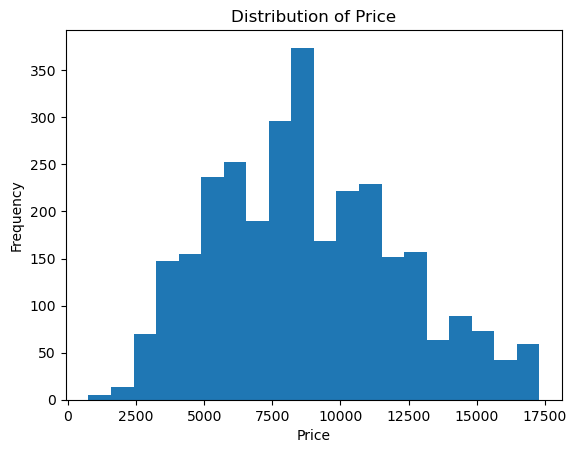

In [204]:
# Histogram of Price
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


2. A graph depicting the effect of the built Size on the price

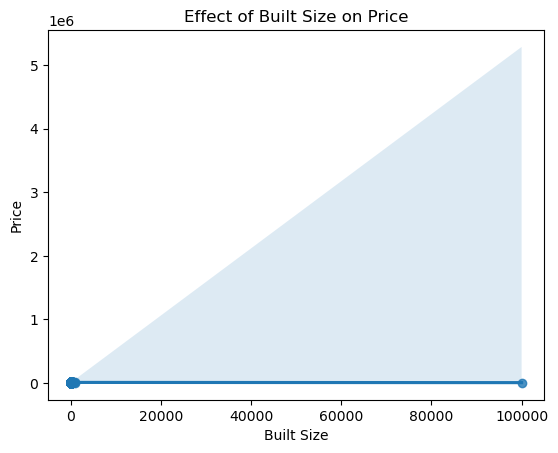

In [205]:
sns.regplot(x=df['Build Size'], y=df['Price'])
plt.xlabel('Built Size')
plt.ylabel('Price')
plt.title('Effect of Built Size on Price')
plt.show()

3. A graph depicting the effect of an apartment with parking on the price

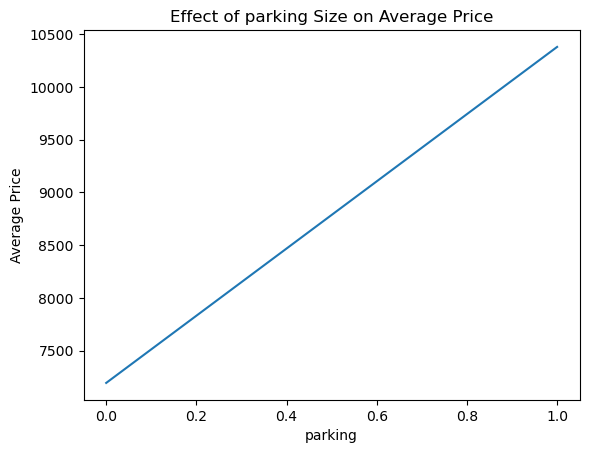

In [206]:
avg_price = df.groupby('חניה')['Price'].mean()

# Create a line plot
avg_price.plot()
plt.xlabel('parking')
plt.ylabel('Average Price')
plt.title('Effect of parking Size on Average Price')
plt.show()

4. A heat map showing the effect of the features on each other.
the variables that most affect the price are חניה and מעלית


I assume that this is because apartments with parking and elevators space are newer apartments, so they have more influence than the other features

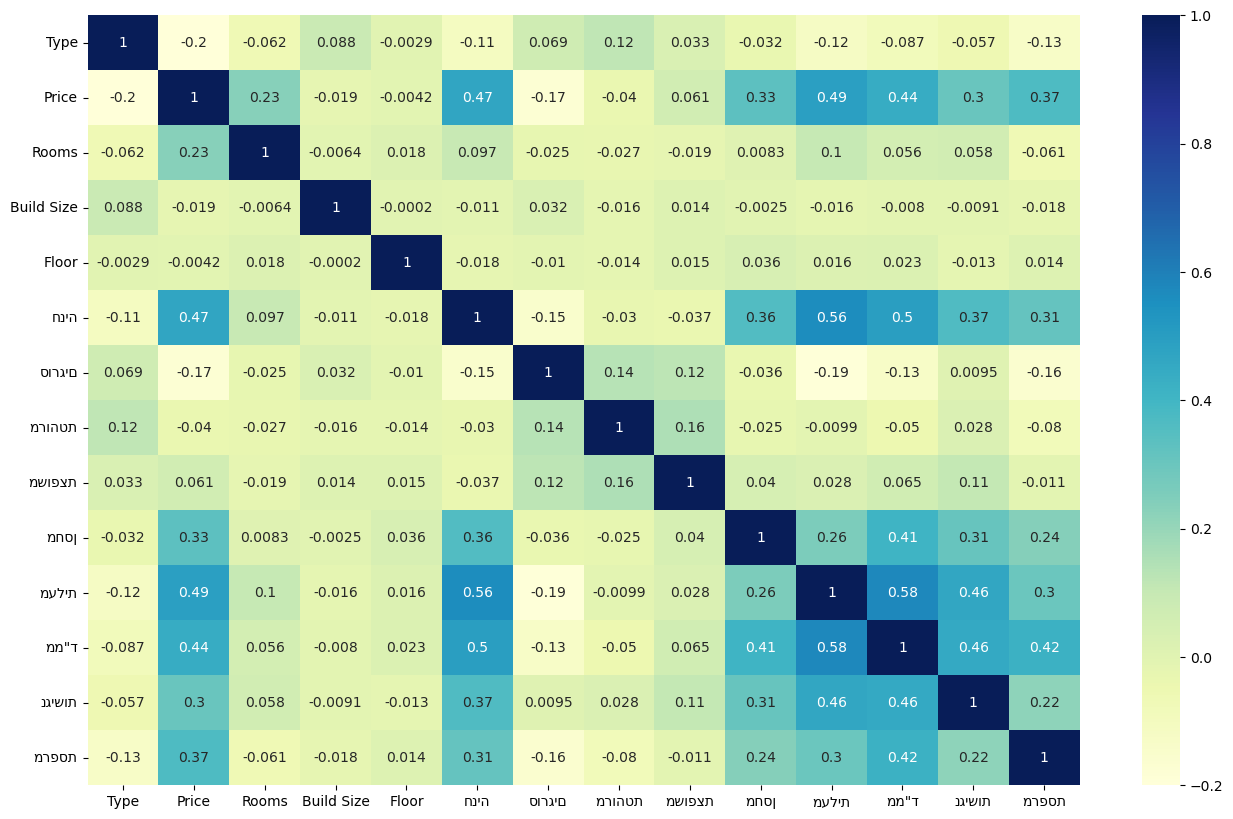

In [207]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Machine Learning

Here I used the LinearRegression model and RandomForestRegressor model, since we are predicting the rental price.


First, I tried to predict using LinearRegression
After using several sites:
geeksforgeeks
Kaggle

I was able to predict a score of 0.25


In order to improve the prediction I used the GPT chat and he suggested I use the RandomForestRegressor model.

I read and researched about the model and indeed the model was able to improve the prediction and the score obtained is 0.62


In [208]:
df.head()

,City,Address,Type,Price,Rooms,Build Size,Floor,חניה,סורגים,מרוהטת,משופצת,מחסן,מעלית,"ממ""ד",נגישות,מרפסת
0,תל אביב יפו,טרומפלדור 48,9,14000,4.0,90,0,0,0,1,1,0,0,0,0,1
1,תל אביב יפו,נהרדעא 10,7,9900,3.0,90,4,1,0,0,0,0,1,0,1,0
2,תל אביב יפו,גרציאני יצחק 6,7,8500,3.0,74,0,1,0,0,0,1,1,1,1,1
3,תל אביב יפו,"ש""ץ 5",7,9200,2.5,60,4,1,0,0,0,0,1,0,0,0
4,תל אביב יפו,הגולן 24,2,12000,5.0,350,0,0,0,0,0,1,1,0,0,1


In [209]:
df.isnull().sum()

City          0
Address       0
Type          0
Price         0
Rooms         0
Build Size    0
Floor         0
חניה          0
סורגים        0
מרוהטת        0
משופצת        0
מחסן          0
מעלית         0
ממ"ד          0
נגישות        0
מרפסת         0
dtype: int64

In [214]:
x = df[['Type','Rooms','Build Size', 'Floor','חניה','סורגים','מרוהטת','משופצת','מחסן','מעלית','ממ"ד','נגישות', 'מרפסת']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# Create the linear regression model
regression = LinearRegression()

# Train the model on the training data
regression.fit(X_train, y_train)

# Make predictions on the testing data
y_predict = regression.predict(X_test)

# Create a DataFrame to compare the actual and predicted prices
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_predict})
print(results)

# Calculate the coefficient of determination (R^2)
r2_score = regression.score(X_test, y_test)
print('Coefficient of Determination (R^2):', r2_score)

      Actual Price  Predicted Price
187           5000      6199.989516
2645          9000     13551.788982
3323          6300      9212.973038
2997         13000     10949.447367
93            6600      6575.141315
...            ...              ...
365           5500     10129.853668
733           7800     14263.701462
2857          4300      9579.762481
1916         10500     10788.713178
3137         10000     10743.191960

[1013 rows x 2 columns]
Coefficient of Determination (R^2): 0.25143591653384534


In [211]:
x = df[['Type','Rooms','Build Size', 'Floor','חניה','סורגים','מרוהטת','משופצת','מחסן','מעלית','ממ"ד','נגישות', 'מרפסת']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state=1)

# Create the random forest regressor model
regression = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the model on the training data
regression.fit(X_train, y_train)

# Make predictions on the testing data
y_predict = regression.predict(X_test)

# Create a DataFrame to compare the actual and predicted prices
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_predict})
print(results)

# Calculate the coefficient of determination (R^2)
r2_score = regression.score(X_test, y_test)
print('Coefficient of Determination (R^2):', r2_score)

      Actual Price  Predicted Price
2421         10500      8023.000000
1914          7500     11310.500000
3007         14000     12322.990000
2028          2300      4383.609048
1265          3650      6866.500000
...            ...              ...
3225          4200      4406.000000
3357          9000      9476.000000
792           5600      5995.666667
1581          2500      2457.000000
3257         13000     13874.500000

[869 rows x 2 columns]
Coefficient of Determination (R^2): 0.6282660288186905
